# Fine-tuning on RegFormer for Cell-type Annotation

In this tutorial, we will demonstrate how to fine-tune a pre-trained RegFormer model on a new dataset to perform the cell-type annotation task.

## 1. Execute the Training and Annotation Pipeline

In [7]:
import sys

sys.path.insert(0, "/home/share/huadjyin/home/s_huluni/project/RegFormer")
from downstream_task.regformer_anno import AnnoTaskMamba

config_file = "anno_10k_SI.toml"
task = AnnoTaskMamba(config_file)
task.runAnnotation()

Save to /home/share/huadjyin/home/s_huluni/project/RegFormer/case/tutorials/anno/saves/anno_10k_SI
scMamba - INFO - Resume model from /home/share/huadjyin/home/s_huluni/project/RegFormer/case/02_pretrain/models/Pretraining/cellxgene/mamba/pt_graph_sort_avg_pool_all_length/best_model.pt, the model args will override the config /home/share/huadjyin/home/s_huluni/project/RegFormer/case/02_pretrain/models/Pretraining/cellxgene/mamba/pt_graph_sort_avg_pool_all_length/args.json.


/home/share/huadjyin/home/s_huluni/anaconda3/envs/py39_torch/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


scMamba - INFO - match 30933/30933 genes in vocabulary of size 60698.
scMamba - INFO - match 30933/30933 genes in vocabulary of size 60698.
scMamba - INFO - 🔧 Filtering genes ...


/home/share/huadjyin/home/s_huluni/anaconda3/envs/py39_torch/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:248: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number


scMamba - INFO - ✅ Normalized data saved to layers['X_normed']
scMamba - INFO - 📝 Pre-log data saved to layers['X_log1p']
scMamba - INFO - 🔍 Selecting HVGs ...


/home/share/huadjyin/home/s_huluni/anaconda3/envs/py39_torch/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:258: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


scMamba - INFO - 🎲 Binning with 51 bins ...
scMamba - INFO - ✅ Binned data saved to layers['X_binned']
scMamba - INFO - ✅ Normalized data saved to layers['X_normed']
scMamba - INFO - 📝 Pre-log data saved to layers['X_log1p']
scMamba - INFO - 🎲 Binning with 51 bins ...
scMamba - INFO - ✅ Binned data saved to layers['X_binned']
AnnData object with n_obs × n_vars = 1040 × 3000
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'Sample', 'Pan_cell_type', 'celltype', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell

## 2. Inspect and Analyze Results

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Loading results from /home/share/huadjyin/home/s_huluni/project/RegFormer/case/tutorials/anno/saves/anno_10k_SI/results.pkl...
Load successful!

Generating confusion matrix...


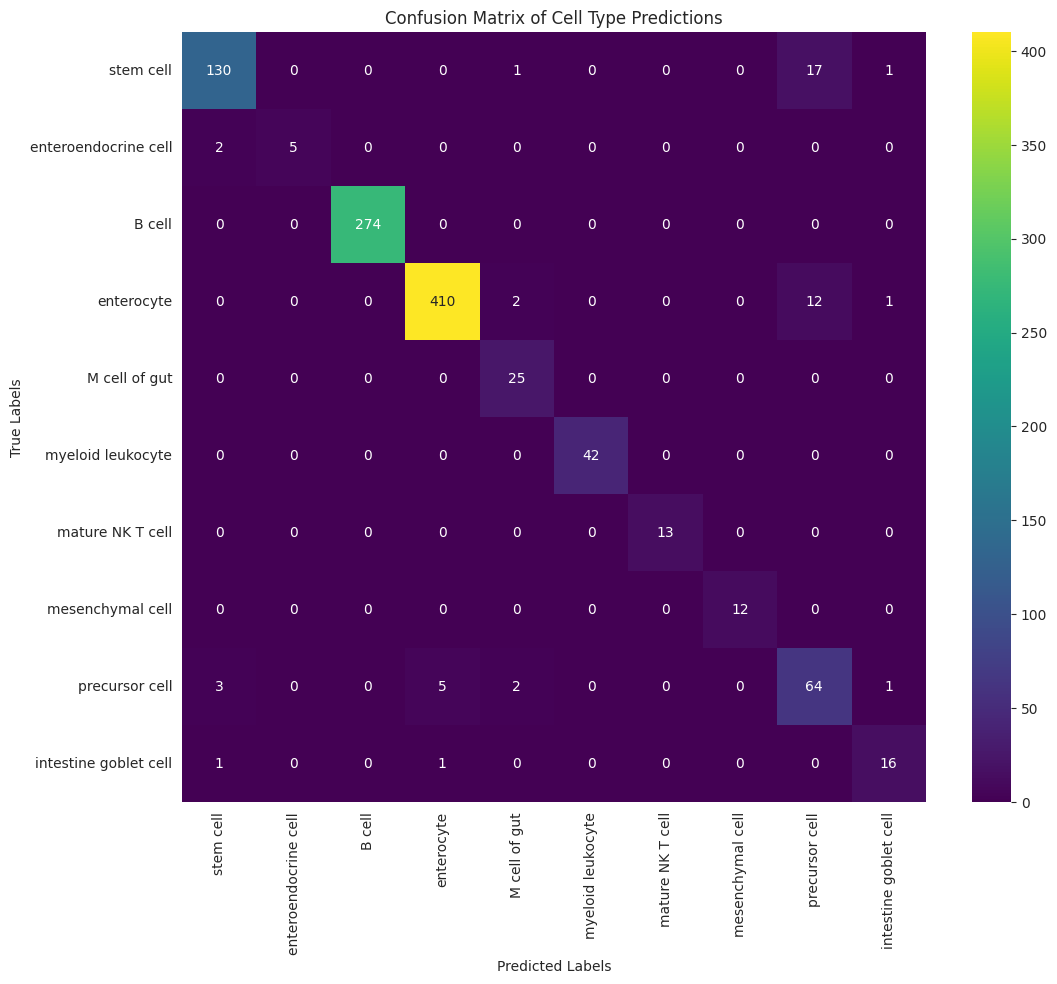

In [2]:
# --- Please paste the full path to your results.pkl file here ---
results_file_path = "/home/share/huadjyin/home/s_huluni/project/RegFormer/case/tutorials/anno/saves/anno_10k_SI/results.pkl"

# --- Load the results file directly ---
print(f"Loading results from {results_file_path}...")
with open(results_file_path, "rb") as f:
    results_data = pickle.load(f)
print("Load successful!")

# Extract information needed for the confusion matrix from the file
predictions = results_data["predictions"]
labels = results_data["labels"]
id2type = results_data["id_maps"]  # Note: the key is 'id_maps'
cell_types = list(id2type.values())

# --- Plot the confusion matrix ---
print("\nGenerating confusion matrix...")
cm = confusion_matrix(labels, predictions)
cm_df = pd.DataFrame(cm, index=cell_types, columns=cell_types)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix of Cell Type Predictions')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()